## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
#importing the necessary libraries
import pandas as pd

# importing the dataset
kingcounty_df = pd.read_csv("kc_house_data.csv")
kingcounty_df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


# DATA CLEANING

In [2]:
kingcounty_df.shape

(21597, 21)

In [3]:
kingcounty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Dealing with missing data, duplicates and placeholders
Currently the following columns in the dataset contain missing data.
* Water front - 2376,
* view - 63
* yr_renovated - 3842

In [4]:
kingcounty_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# droppin the rows missing data
kingcounty_df.dropna(inplace = True)

Decided that it was easier to drop the rows to avoid losing alot of data and it affecting the regressions.

In [6]:
kingcounty_df.shape

(15762, 21)

### Duplicates

In [7]:
# checking for duplicates
duplicates = kingcounty_df[kingcounty_df.duplicated(
subset = "id")]
duplicates


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
718,8820903380,1/2/2015,730000.0,6,2.25,2660,13579,2.0,NO,NONE,...,7 Average,2660,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242
837,8682262400,5/13/2015,419950.0,2,1.75,1350,4003,1.0,NO,NONE,...,8 Good,1350,0.0,2004,0.0,98053,47.7176,-122.033,1350,4479
1085,9834200885,4/20/2015,550000.0,4,2.50,2080,4080,1.0,NO,NONE,...,7 Average,1040,1040.0,1962,0.0,98144,47.5720,-122.290,1340,4080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18977,7856400300,3/22/2015,1510000.0,2,2.50,3180,9400,2.0,NO,EXCELLENT,...,10 Very Good,2610,570.0,1985,0.0,98006,47.5617,-122.158,3760,9450
19537,643300040,3/13/2015,719521.0,4,1.75,1920,9500,1.0,NO,NONE,...,7 Average,1470,450.0,1966,0.0,98006,47.5683,-122.177,1820,10091
20038,8648900110,8/26/2014,555000.0,3,2.50,1940,3211,2.0,NO,NONE,...,8 Good,1940,0.0,2009,0.0,98027,47.5644,-122.093,1880,3078
20165,7853400250,2/19/2015,645000.0,4,3.50,2910,5260,2.0,NO,NONE,...,9 Better,2910,0.0,2012,0.0,98065,47.5168,-121.883,2910,5260


In [8]:
# dropping the duplicated data
kingcounty_df.drop_duplicates(subset="id", keep="first", inplace=True)

In [9]:
kingcounty_df.shape

(15676, 21)

### placeholders

In [10]:
kingcounty_df.sample(n=12) 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20619,1042700270,6/16/2014,852880.0,4,3.25,3450,6184,2.0,NO,NONE,...,9 Better,3450,0.0,2014,0.0,98074,47.6072,-122.054,3020,5369
11176,5126300960,1/27/2015,442250.0,3,2.50,2170,8169,2.0,NO,NONE,...,8 Good,2170,0.0,2003,0.0,98059,47.4833,-122.139,2240,6733
7575,3883100220,1/20/2015,299000.0,3,1.75,2010,8065,1.0,NO,NONE,...,7 Average,1090,920.0,1984,0.0,98031,47.4171,-122.202,1560,8065
17336,3905040780,9/24/2014,520000.0,4,3.00,2190,5085,2.0,NO,NONE,...,8 Good,2190,0.0,1992,0.0,98029,47.5693,-122.002,2130,5142
7134,9113200290,6/25/2014,725000.0,4,2.50,2490,5170,2.0,NO,NONE,...,9 Better,2490,0.0,2000,0.0,98052,47.6836,-122.162,2490,5170
3212,868001295,10/29/2014,650000.0,3,1.75,1660,10819,1.0,NO,NONE,...,7 Average,1240,420.0,1942,0.0,98177,47.7045,-122.379,3110,11853
2738,1552100135,6/9/2014,1150000.0,3,2.50,2850,10474,1.0,NO,NONE,...,8 Good,1730,1120.0,1954,0.0,98004,47.6218,-122.209,2820,10474
7287,1923039022,11/20/2014,700000.0,2,1.75,1679,577605,2.0,NO,NONE,...,9 Better,1679,0.0,2001,0.0,98070,47.4630,-122.475,1850,358934
15665,5026900235,9/11/2014,1850000.0,4,3.25,2910,1880,2.0,NO,GOOD,...,9 Better,1830,1080.0,1914,0.0,98122,47.6160,-122.282,3100,8200
5242,7284900460,11/20/2014,890000.0,4,2.50,3370,7200,2.0,NO,NONE,...,8 Good,3370,0.0,2014,0.0,98177,47.7698,-122.384,1880,7200


In [11]:
# changing the sqft_basement column from categorical to numerical
kingcounty_df["sqft_basement"] = pd.to_numeric(kingcounty_df["sqft_basement"], errors='coerce')
kingcounty_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [12]:
# missing data that was originally in filled by symbols
kingcounty_df["sqft_basement"].isna().sum()

332

The sqft_basement is missing **332** data points

In [13]:
# Drop the missing data in the above column
kingcounty_df.dropna(inplace = True)

In [14]:
kingcounty_df.shape

(15344, 21)

Creating a **numerical** column to replace the **categorical** data

In [15]:
kingcounty_df["view"].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [16]:
# create a mapping dictionary
mapping_dict = {"NONE": 1, "FAIR": 2, "AVERAGE": 3, "GOOD": 4, "EXCELLENT": 5,}

# map the ordinal column to the appropriate numerical values
kingcounty_df['view_num'] = kingcounty_df['view'].map(mapping_dict)

In [17]:
kingcounty_df.head()

# Map 'yes' to 1 and 'no' to 0
kingcounty_df["waterfront_num"] = kingcounty_df["waterfront"].map({'YES': 1, 'NO': 0})                                                

kingcounty_df.head(5)

kingcounty_df.dtypes


id                  int64
date               object
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront         object
view               object
condition          object
grade              object
sqft_above          int64
sqft_basement     float64
yr_built            int64
yr_renovated      float64
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
view_num            int64
waterfront_num      int64
dtype: object

In [18]:
kingcounty_df['date_column'] = pd.to_datetime(kingcounty_df['date'])
kingcounty_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,view_num,waterfront_num,date_column
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,0,2014-12-09
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1965,0.0,98136,47.5208,-122.393,1360,5000,1,0,2014-12-09
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1987,0.0,98074,47.6168,-122.045,1800,7503,1,0,2015-02-18
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,2001,0.0,98053,47.6561,-122.005,4760,101930,1,0,2014-05-12
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,1960,0.0,98146,47.5123,-122.337,1780,8113,1,0,2015-04-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,2008,0.0,98116,47.5773,-122.409,1330,1265,1,0,2015-02-19
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,2009,0.0,98103,47.6993,-122.346,1530,1509,1,0,2014-05-21
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2014,0.0,98146,47.5107,-122.362,1830,7200,1,0,2015-02-23
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,2009,0.0,98144,47.5944,-122.299,1020,2007,1,0,2014-06-23


<b>Feature Engineering Using Schools Information</b>


<b> Schools Background Information </b>
For the 2023 school year, there are 532 public schools serving 283,656 students in King County, WA (there are 330 private schools, serving 56,255 private students). 83% of all K-12 students in King County, WA are educated in public schools (compared to the WA state average of 90%). King County has one of the highest concentrations of top ranked public schools in Washington.

<b>Seattle School District</b>
Seattle School District also called district NO. 1 whose district ID is NCES District ID: 5307710 has average <b>Teacher FTE of 3,110.54	against State average of 176.39 and National average of 176.60.<b/> making it one of the best school districts

In [19]:
#GPS cordinates of Cascadia Elemntary School - 	Long :47.694038, Lat: -122.337558 
#Now Using Haversine Formula calculate distance from Cascadia Elementary School
import math

def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Radius of the Earth in kilometers
    radius = 6371

    # Haversine formula
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = radius * c

    return distance



In [20]:
#create new column distance that returns distance from Seattle School District

kingcounty_df['dist_from_sch_district_1'] = kingcounty_df.apply(lambda row: haversine_distance(row['lat'], row['long'], 47.694038, -122.337558), axis=1)

kingcounty_df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,view_num,waterfront_num,date_column,dist_from_sch_district_1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1991.0,98125,47.7210,-122.319,1690,7639,1,0,2014-12-09,3.304003
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,0.0,98136,47.5208,-122.393,1360,5000,1,0,2014-12-09,19.706495
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,98074,47.6168,-122.045,1800,7503,1,0,2015-02-18,23.535440
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,0.0,98053,47.6561,-122.005,4760,101930,1,0,2014-05-12,25.253879
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,0.0,98146,47.5123,-122.337,1780,8113,1,0,2015-04-15,20.208387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,0.0,98116,47.5773,-122.409,1330,1265,1,0,2015-02-19,14.041097
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,0.0,98103,47.6993,-122.346,1530,1509,1,0,2014-05-21,0.861119
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,0.0,98146,47.5107,-122.362,1830,7200,1,0,2015-02-23,20.468455
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,0.0,98144,47.5944,-122.299,1020,2007,1,0,2014-06-23,11.449609


In [23]:
# Calculate the correlation between 'distance' and 'price'
correlation = kingcounty_df['dist_from_sch_district_1'].corr(kingcounty_df['price'])

# Print the correlation value
print("Correlation between distance and price:", correlation)

Correlation between distance and price: -0.30037127733476515


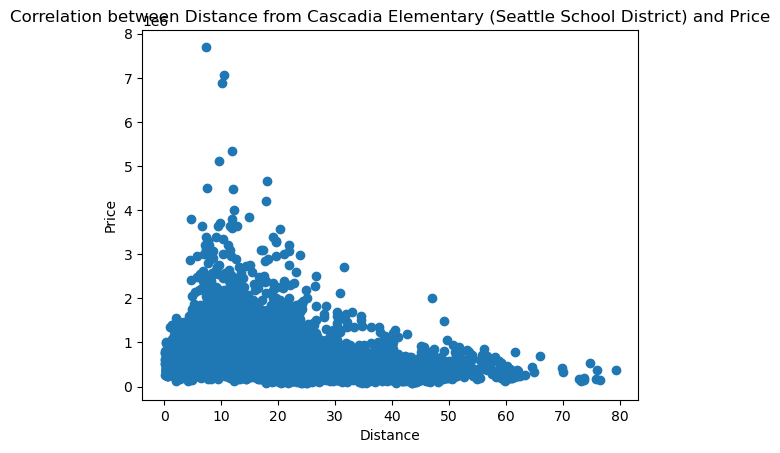

In [25]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a scatter plot
plt.scatter(kingcounty_df['dist_from_sch_district_1'], kingcounty_df['price'])
plt.xlabel('Distance')
plt.ylabel('Price')
plt.title('Correlation between Distance from Cascadia Elementary (Seattle School District) and Price')

# Display the plot
plt.show()

<b> Conclusion</b> This district has a student teacher ratio of 16.54 against national average of XX, it also has average <b>Teacher FTE of 3,110.54	against State average of 176.39 and National average of 176.60.<b/>. Therefore, Home buyers want to be near Cascadia School itself or in the same School District with Cascadia.
    

<b> 2.0.Heatmap of location versus Price </b>

<b>Lets try distance from Seattle (County Capital) in Washington State and price</b>

Washington State’s largest city, it’s home to a large tech industry, with Microsoft and Amazon headquartered in its metropolitan area.

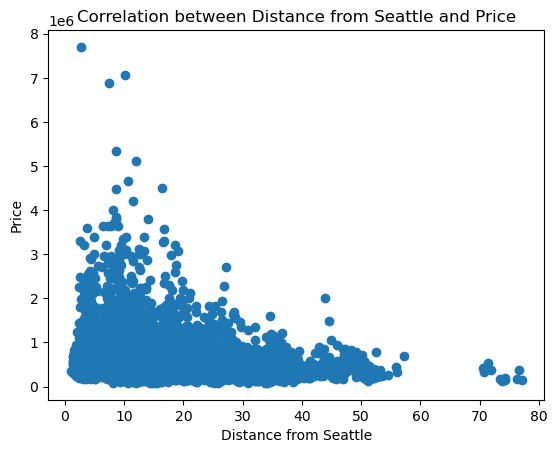

In [26]:
#Seattle is 47.6062° N, -122.3321° W </b

kingcounty_df['distance_from_seattle'] = kingcounty_df.apply(lambda row: haversine_distance(row['lat'], row['long'], 47.6062, -122.3321), axis=1)

# Create a scatter plot
plt.scatter(kingcounty_df['distance_from_seattle'], kingcounty_df['price'])
plt.xlabel('Distance from Seattle')
plt.ylabel('Price')
plt.title('Correlation between Distance from Seattle and Price')

# Display the plot
plt.show()

<b>Seattle</b> being the <b>largest City in the County</b> has other amenities in addition to better schools and also offers a better job market with large multinational employers. For example, Both <b> Microsoft and Amazon are headquarted in Seattle </b>
This makes it a top homeowners choice 

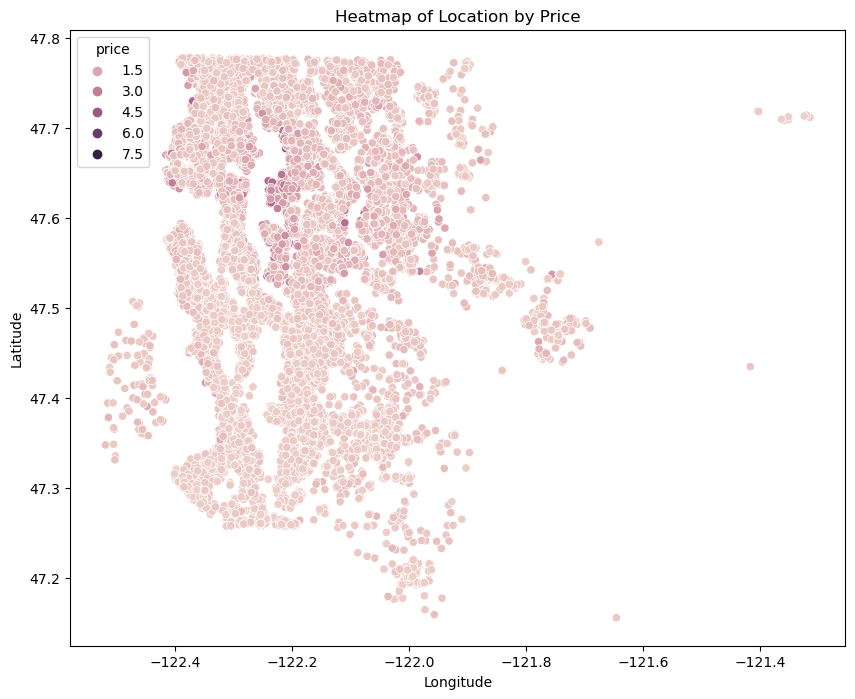

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with color-coded price
plt.figure(figsize=(10, 8))
sns.scatterplot(x='long', y='lat', hue='price', data=kingcounty_df, cmap='hsv', alpha=1)

# Set the title and labels
plt.title('Heatmap of Location by Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()

#Option to plot price per zipcode with tableau

<b>Average Price per ZipCode </b>

In [28]:
#add average price per each unique zipcode
kingcounty_df['avg_price_per_zipcode'] = kingcounty_df.groupby('zipcode')['price'].transform('mean')
kingcounty_df
#you can ignore this column. It can be usedful for plotting price per zipcode with tableau


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,view_num,waterfront_num,date_column,dist_from_sch_district_1,distance_from_seattle,avg_price_per_zipcode
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,47.7210,-122.319,1690,7639,1,0,2014-12-09,3.304003,12.802819,458403.726644
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,47.5208,-122.393,1360,5000,1,0,2014-12-09,19.706495,10.538233,554938.026316
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,47.6168,-122.045,1800,7503,1,0,2015-02-18,23.535440,21.553979,700447.730640
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,47.6561,-122.005,4760,101930,1,0,2014-05-12,25.253879,25.131188,660888.783972
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,47.5123,-122.337,1780,8113,1,0,2015-04-15,20.208387,10.447676,353172.512315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,47.5773,-122.409,1330,1265,1,0,2015-02-19,14.041097,6.601720,606011.417355
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,47.6993,-122.346,1530,1509,1,0,2014-05-21,0.861119,10.404472,577236.877108
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,47.5107,-122.362,1830,7200,1,0,2015-02-23,20.468455,10.853552,353172.512315
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,47.5944,-122.299,1020,2007,1,0,2014-06-23,11.449609,2.807293,597851.039841


<b> Seasonality and Price </b>


In [29]:
kingcounty_df['date'] = pd.to_datetime(kingcounty_df['date'])
#Extract the month from the date column and create a new column
kingcounty_df['month'] = kingcounty_df['date'].dt.month
#Map months to correspondng seasons
season_mapping = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
                  7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
kingcounty_df['season'] = kingcounty_df['month'].map(season_mapping)
kingcounty_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,view_num,waterfront_num,date_column,dist_from_sch_district_1,distance_from_seattle,avg_price_per_zipcode,month,season
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1690,7639,1,0,2014-12-09,3.304003,12.802819,458403.726644,12,Winter
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1360,5000,1,0,2014-12-09,19.706495,10.538233,554938.026316,12,Winter
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1800,7503,1,0,2015-02-18,23.535440,21.553979,700447.730640,2,Winter
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,4760,101930,1,0,2014-05-12,25.253879,25.131188,660888.783972,5,Spring
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,1780,8113,1,0,2015-04-15,20.208387,10.447676,353172.512315,4,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2015-02-19,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,1330,1265,1,0,2015-02-19,14.041097,6.601720,606011.417355,2,Winter
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,1509,1,0,2014-05-21,0.861119,10.404472,577236.877108,5,Spring
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,1830,7200,1,0,2015-02-23,20.468455,10.853552,353172.512315,2,Winter
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,2007,1,0,2014-06-23,11.449609,2.807293,597851.039841,6,Summer


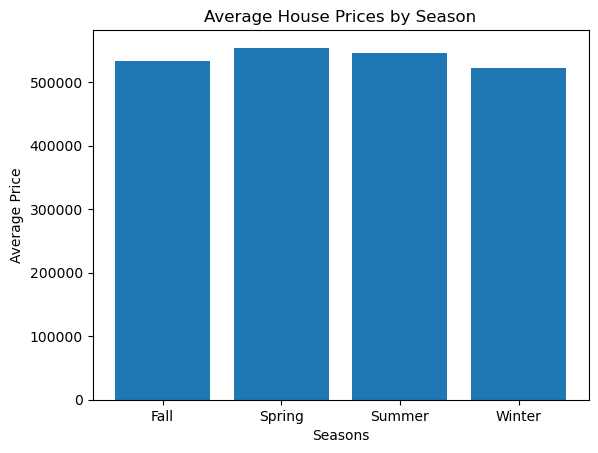

In [30]:
#Group price by seasons 
season_prices = kingcounty_df.groupby('season')['price'].mean()
season_prices
# plot
seasons = ['Fall', 'Spring', 'Summer', 'Winter']

plt.bar(seasons, season_prices)

# Set x-label and y-label
plt.xlabel('Seasons')
plt.ylabel('Average Price')

# Set title
plt.title('Average House Prices by Season')

# Show the plot
plt.show()

<b>Conclusion</b> Best time to buy houses is during winter and best time for selling is spring